# Linear regression with wine dataset example
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

---

This notebook demonstrates solving a simple linear regression problem with Scikit-learn library.

The dataset is taken from UCI ML repository. We chose the red wine dataset.
<br>Here is the link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Read the dataset

In [2]:
df = pd.read_csv("Data/winequality-red.csv",sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### How many data points in total?

In [4]:
df.shape

(1599, 12)

### Let's plot the response variable w.r.t. all predictors

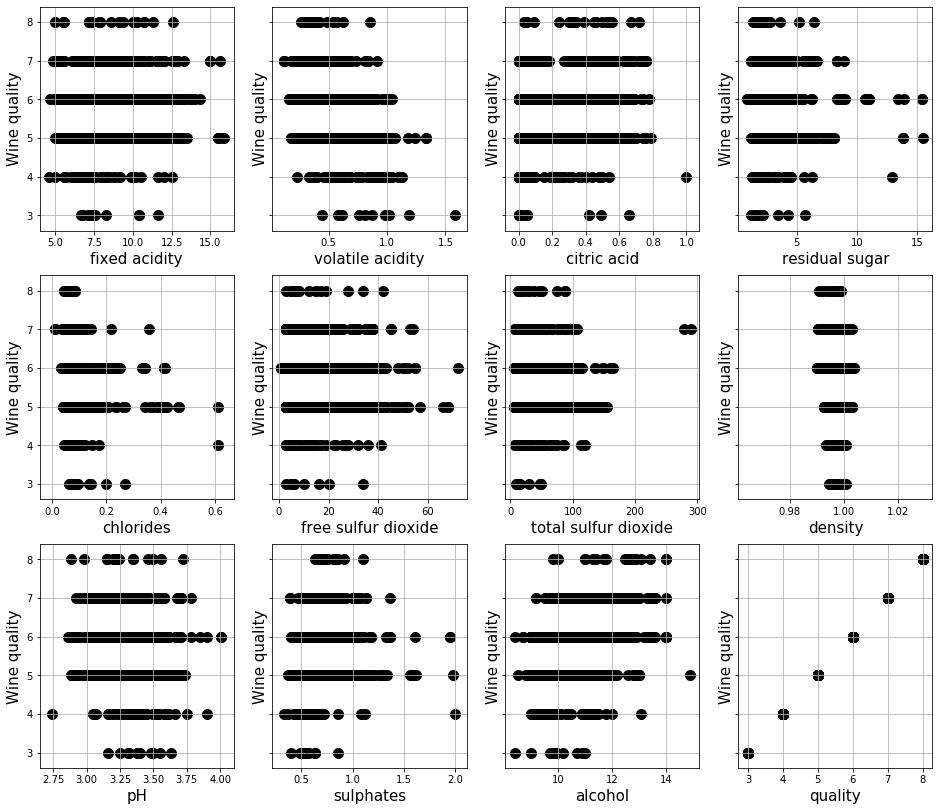

In [5]:
fig,ax = plt.subplots(3,4,figsize=(16,14),sharey=True)
ax = ax.ravel()
for i in range(12):
    ax[i].scatter(df[df.columns[i]],df['quality'],c='k',s=100)
    ax[i].grid(True)
    ax[i].set_xlabel(f"{df.columns[i]}",fontsize=15)
    ax[i].set_ylabel('Wine quality',fontsize=15)
plt.show()

### Test/train split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[df.columns[:11]]
y = df['quality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Import the `LinearRegression` class from Scikit-learn `linear_model` module

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()

### Fit the estimator with the training data

In [11]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### $R^2$ score with the test data

In [12]:
lm.score(X_test,y_test)

0.40318034127962304

### Computing RMSE using `mean_squared_error` metric from Scikit-learn

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
y_pred = lm.predict(X_test)

In [15]:
mse=mean_squared_error(y_test,y_pred)

In [16]:
rmse = np.sqrt(mse)

In [17]:
print("Root-mean-squared-error is:",rmse)

Root-mean-squared-error is: 0.6245199307980125


### What is the regression/fitting equation?
- Extract the coefficients using `lm.coef_`
- Extract the intercept using `lm.intercept_`

In [18]:
lm.coef_

array([ 2.30853339e-02, -1.00130443e+00, -1.40821461e-01,  6.56431104e-03,
       -1.80650315e+00,  5.62733439e-03, -3.64444893e-03, -1.03515936e+01,
       -3.93687732e-01,  8.41171623e-01,  2.81889567e-01])

In [19]:
lm.intercept_

14.355105195765027

### Write a simple block of code to print the equation

In [20]:
eq = ''
# Add the intercept first
eq+=str(round(lm.intercept_,3))
#eq+= ' + '
# Loop through the dataset column names and the coefficient array and add the terms to the string
for i in range(11):
    if lm.coef_[i]>0:
        eq+=' + '
    eq+=' '+ str(round(lm.coef_[i],3))+'*'+df.columns[i]

In [21]:
print(eq)

14.355 +  0.023*fixed acidity -1.001*volatile acidity -0.141*citric acid +  0.007*residual sugar -1.807*chlorides +  0.006*free sulfur dioxide -0.004*total sulfur dioxide -10.352*density -0.394*pH +  0.841*sulphates +  0.282*alcohol


### Utility function to turn farctional regression predictions to integers

In [22]:
def int_quality(x):
    frac = x - int(x)
    if frac>0.5:
        result=int(x)+1
    else: 
        result=int(x)
    return result

In [23]:
vectorize_int=np.vectorize(int_quality)

In [24]:
y_pred_int = vectorize_int(y_pred)

In [25]:
mse=mean_squared_error(y_test,y_pred_int)

In [26]:
rmse=np.sqrt(mse)

In [27]:
print("Root-mean-squared-error is:",rmse)

Root-mean-squared-error is: 0.6754628043053148


### We can plot how the predicted wine quality match up with the true values (test set)

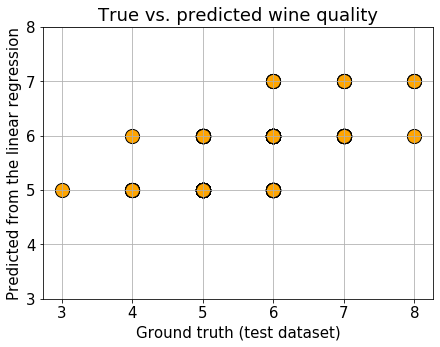

In [28]:
plt.figure(figsize=(7,5))
plt.title("True vs. predicted wine quality",fontsize=18)
plt.scatter(y_test,y_pred_int,c='orange',edgecolor='k',s=200)
plt.xlabel("Ground truth (test dataset)",fontsize=15)
plt.ylabel("Predicted from the linear regression",fontsize=15)
plt.xticks([i for i in range(3,9)],fontsize=15)
plt.yticks([i for i in range(3,9)],fontsize=15)
plt.grid(True)
plt.show()